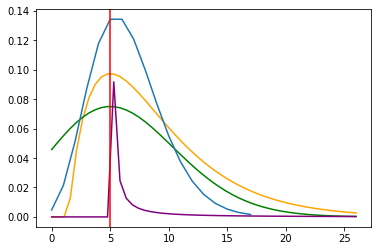

In [3]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import math

from operator import itemgetter 
from enum import Enum

fig, ax = plt.subplots(1, 1)

SEATS = 5

CANDIDATES = SEATS*5

class Choice(Enum):
    GEOMETRIC = 0
    SMOOTH = 1
    LINEAR = 2
    CONSTANT = 3


def drawDistrib(dist, lbl, color):
    x = np.linspace(0, CANDIDATES+1)
    ax.plot(x, dist.pdf(x), label=lbl, color=color)   
    
def getDistParams(dist):
    """ Generates the correct parameters for a statistical distribution such that when mapped onto the number of choices, the peak aligns with the number of seats. This allows"""
    # Get first and 99th percentile
    i01, i99 = dist.ppf(0.01), dist.ppf(0.99)
    # Length of distribution initially
    ilen = i99-i01
    # generate 1000 steps
    x = np.linspace(i01, i99, 1001)
    # Find the height at each step
    h = list(map(lambda p: (p, dist.pdf(p)), x))
    maxi = max(h, key = itemgetter(1))[0]
    # Relative position of the highest x val
    rel = maxi/ilen
    # In the scale of candidate size, where does the peak occur
    prop_loc = rel*CANDIDATES
    
    # Shift so that the peak is aligned with SEATS 
    loc = SEATS - prop_loc
    scale = CANDIDATES/ilen
    
    return loc, scale

a=1.9
loc, scale = getDistParams(sps.gamma(a))
drawDistrib(sps.gamma(a, loc=loc, scale=scale), lbl="gamma", color="orange")

a=80
loc, scale = getDistParams(sps.chi2(a))
drawDistrib(sps.chi2(a, loc=loc, scale=scale), lbl="chi2", color="green")

a=5
loc, scale = getDistParams(sps.lognorm(a))
drawDistrib(sps.lognorm(a, loc=loc, scale=scale), lbl="lognorm", color="Purple")

dist = sps.nbinom(15,.7)
x = np.arange(0, 18)
ax.plot(x, dist.pmf(x))
plt.axvline(5, color="red")



In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy scipy matplotlib


     |████████████████████████████████| 14.5 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 46.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.1 MB/s eta 0:00:01
